In [122]:
import os
import sys

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['PYTHONIOENCODING'] = 'utf-8'

import matplotlib.pyplot as plt
import pathlib
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras

#sys.stdout.reconfigure(encoding='utf-8')
#sys.stderr.reconfigure(encoding='utf-8')

size_tuple = (250,250)
epochs = 40

In [123]:
categorias = []
labels = []
imagenes  = []

In [124]:
categorias =  [archivo for archivo in os.listdir("Imagenes") if not archivo.startswith('.')]
print(categorias)

['Boca', 'Estudiantes', 'Gimnasia', 'Independiente', 'Racing', 'River', 'San Lorenzo']


In [125]:
x=0
for directorio in categorias:
    imagenes_dir = [imagen for imagen in os.listdir('Imagenes/'+directorio) if not imagen.startswith('.')]
    for imagen in imagenes_dir:
        img = Image.open('Imagenes/'+directorio+'/'+imagen).resize(size_tuple)
        img = np.asarray(img)
        imagenes.append(img)
        labels.append(x)
    x += 1

In [126]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [127]:
imagenes=np.asanyarray(imagenes)
imagenes.shape
imagenes = imagenes[:,:,:,0]

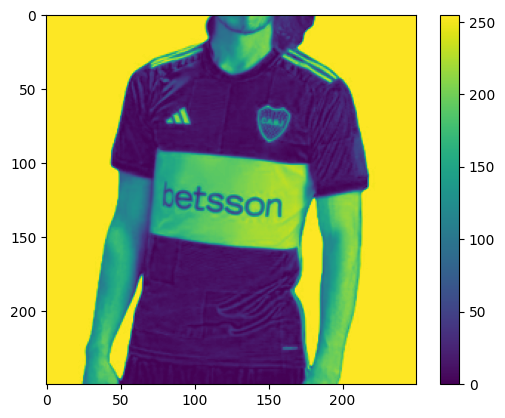

In [128]:
plt.figure()
plt.imshow(imagenes[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [129]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=size_tuple),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(len(categorias),activation='softmax')
])

In [130]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [131]:
labels = np.array(labels)

In [145]:
history = model.fit(imagenes, labels, epochs=epochs)

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8034 - loss: 268.8382
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7978 - loss: 336.4572
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8303 - loss: 216.2996
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9827 - loss: 12.7703
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8518 - loss: 116.5665
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9277 - loss: 23.6682
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8640 - loss: 60.1841
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8557 - loss: 96.6335 
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9424 - loss: 12.7764
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9810 - loss: 2.8238   
Epoch 11/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9714 - loss: 12.8072
Epoch 12/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 1.0

In [151]:
nombre_imagen_de_prueba = os.listdir("Validacion/Actual")[0]
imagen_prueba = "Validacion/Actual/" + nombre_imagen_de_prueba
im = Image.open(imagen_prueba).resize(size_tuple)
im = np.asarray(im)
im = im[:,:,0]
im = np.asarray([im])
im.shape
test=im

In [152]:
prediccion = model.predict(test)  
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0. 0. 0. 0. 1. 0. 0.]]


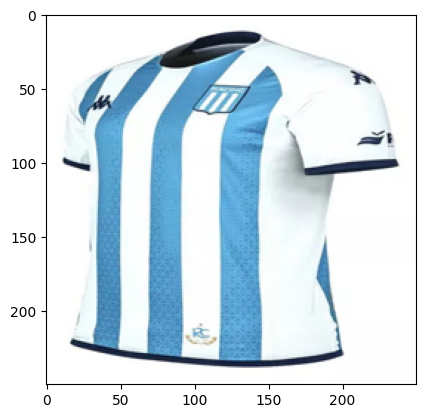

In [153]:
img = Image.open(imagen_prueba).resize(size_tuple)
plt.figure()
plt.imshow(img)
plt.show()

In [154]:
categorias[np.argmax(prediccion[0])]

'Racing'

In [150]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 62500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     8,000,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,003,095 (91.56 MB)

 Trainable params: 8,001,031 (30.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,002,064 (61.04 MB)

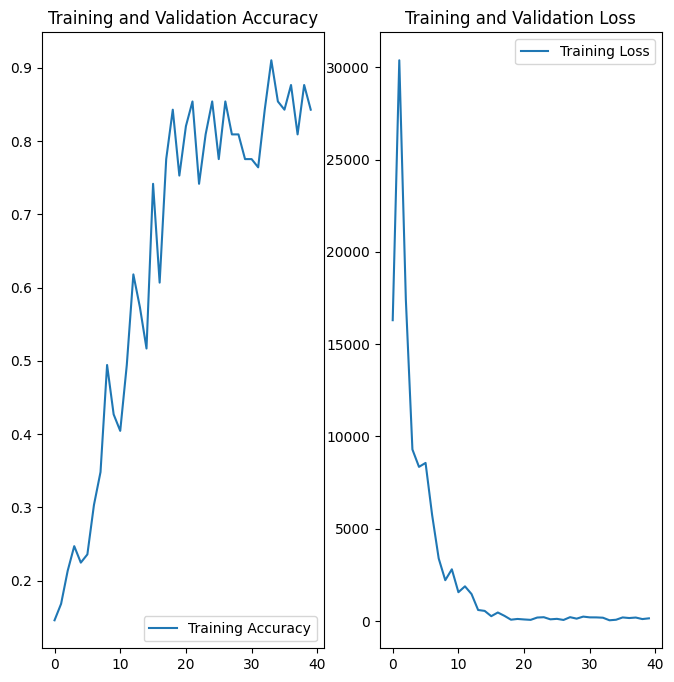

In [138]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [139]:
tf.keras.utils.plot_model(model,to_file='rna.png', show_shapes=True,rankdir='LR')

You must install pydot (`pip install pydot`) for `plot_model` to work.
